In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
cars_df = pd.read_csv('CarsData.csv')
cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


## Part1: Preprocessing

Handling Missing Values

In [4]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = cars_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = cars_df.select_dtypes(include=['object']).columns

cars_df[num_cols] = num_imputer.fit_transform(cars_df[num_cols])
cars_df[cat_cols] = cat_imputer.fit_transform(cars_df[cat_cols])

Encoding Categorical Variables

In [5]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cat = pd.DataFrame(encoder.fit_transform(cars_df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))
cars_df = cars_df.drop(cat_cols, axis=1)
cars_df = pd.concat([cars_df, encoded_cat], axis=1)

C:\Users\Ahmadreza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Scaling Numerical Features

In [6]:
scaler = StandardScaler()
cars_df[num_cols] = scaler.fit_transform(cars_df[num_cols])

Removing Duplicates

In [7]:
cars_df = cars_df.drop_duplicates()
cars_df.head()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Other,fuelType_Petrol,Manufacturer_BMW,Manufacturer_ford,Manufacturer_hyundi,Manufacturer_merc,Manufacturer_skoda,Manufacturer_toyota,Manufacturer_vauxhall,Manufacturer_volkswagen
0,-0.031389,-0.940212,-0.550287,0.392342,0.302466,-1.190382,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.031389,-0.586157,-0.665668,0.392342,0.228308,-1.190382,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.912609,1.136597,-1.025863,0.392342,-0.346420,0.599900,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.031389,-0.433550,0.367533,0.471260,0.469322,0.599900,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.031389,-0.889141,-0.183587,0.076670,-0.055966,-0.832326,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 2: Feature Engineering and Selection

Feature Selection: Removing features with low variance

In [9]:
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
features = selector.fit_transform(cars_df.drop(columns=['price']))

In [10]:
selected_features = selector.get_support(indices=True)
cars_df_selected = cars_df.iloc[:, selected_features]

cars_df_selected['price'] = cars_df['price']
cars_df_selected.head()

C:\Users\Ahmadreza\AppData\Local\Temp\ipykernel_10392\1084138297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_selected['price'] = cars_df['price']


,year,price,mileage,tax,mpg,model_230,transmission_Other,fuelType_Other
0,-0.031389,-0.940212,-0.550287,0.392342,0.302466,0.0,0.0,0.0
1,-0.031389,-0.586157,-0.665668,0.392342,0.228308,0.0,0.0,0.0
2,0.912609,1.136597,-1.025863,0.392342,-0.346420,0.0,0.0,0.0
3,-0.031389,-0.433550,0.367533,0.471260,0.469322,0.0,0.0,0.0
4,-0.031389,-0.889141,-0.183587,0.076670,-0.055966,0.0,0.0,0.0


## Part 3: Dimensionality Reduction

In [13]:
X = cars_df_selected.drop(columns='price')
y = cars_df_selected['price']

Applying PCA to reduce to 2 dimensions

In [14]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

In [15]:
explained_variance_2d = np.sum(pca.explained_variance_ratio_)
print(f"Variance retained with 2 dimensions: {explained_variance_2d}")

Variance retained with 2 dimensions: 0.7981004138134078


In [16]:
pca_full = PCA(n_components=0.95)
pca_full.fit(X)
n_components_95 = pca_full.n_components_
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 4


In [17]:
X.to_csv('cars_data_selected.csv', index=False)
pd.DataFrame(pca_2d, columns=['PCA1', 'PCA2']).to_csv('cars_data_pca_2d.csv', index=False)

## Part 4: Evaluation Metric

For regression, we will use Mean Absolute Error (MAE) and R² Score.

**MAE**: Provides a clear and intuitive measure of prediction error in the same units as the target variable and is robust to outliers.

**R²** Score: Indicates how well the model explains the variability in the target variable and is useful for comparing different models.

## Part 5: Model Training

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Method One: Neural Network


In [33]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,100,100),
                        activation='tanh',
                        learning_rate='adaptive',
                        shuffle=True,
                        warm_start=True,
                        max_iter=500,
                        random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

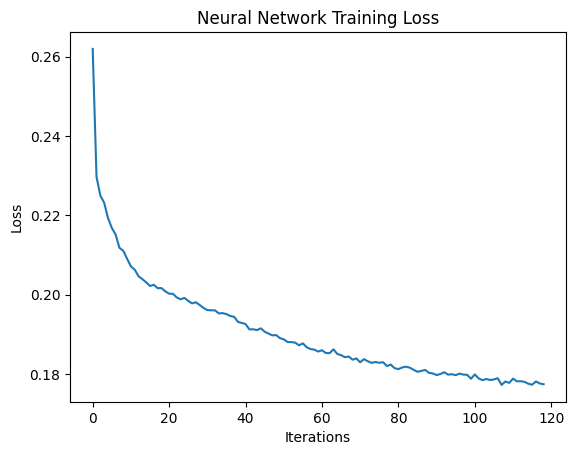

Neural Network MAE: 0.417793656710838, R2: 0.6259650390040914


In [34]:
plt.plot(nn_model.loss_curve_)
plt.title('Neural Network Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

print(f"Neural Network MAE: {nn_mae}, R2: {nn_r2}")

### Method Two: Decision Tree

In [22]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree MAE: {dt_mae}, R2: {dt_r2}")

Decision Tree MAE: 0.4897643805905965, R2: 0.41156288072189706


### Method Three: Linear Regression

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression MAE: {lr_mae}, R2: {lr_r2}")

Linear Regression MAE: 0.570016918537817, R2: 0.31449091798349127


### Comparison of Models

In [35]:
print("Comparison of Models:")
print(f"Neural Network - MAE: {nn_mae}, R2: {nn_r2}")
print(f"Decision Tree - MAE: {dt_mae}, R2: {dt_r2}")
print(f"Linear Regression - MAE: {lr_mae}, R2: {lr_r2}")

Comparison of Models:
Neural Network - MAE: 0.417793656710838, R2: 0.6259650390040914
Decision Tree - MAE: 0.4897643805905965, R2: 0.41156288072189706
Linear Regression - MAE: 0.570016918537817, R2: 0.31449091798349127


## Part 6: Feature Analysis

Using the PCA-reduced data for feature analysis

In [36]:
pca_df = pd.read_csv('cars_data_pca_2d.csv')
X_pca = pca_df[['PCA1', 'PCA2']]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [37]:
nn_model_pca = MLPRegressor(hidden_layer_sizes=(100,100,100),
                        activation='tanh',
                        learning_rate='adaptive',
                        shuffle=True,
                        warm_start=True,
                        max_iter=500,
                        random_state=42)
nn_model_pca.fit(X_train_pca, y_train_pca)
nn_pred_pca = nn_model_pca.predict(X_test_pca)
nn_mae_pca = mean_absolute_error(y_test_pca, nn_pred_pca)
nn_r2_pca = r2_score(y_test_pca, nn_pred_pca)

print(f"Neural Network with PCA MAE: {nn_mae_pca}, R2: {nn_r2_pca}")

Neural Network with PCA MAE: 0.4758407401302003, R2: 0.5661294689451464


In [38]:
print("Comparison with PCA:")
print(f"Original - MAE: {nn_mae}, R2: {nn_r2}")
print(f"PCA - MAE: {nn_mae_pca}, R2: {nn_r2_pca}")

Comparison with PCA:
Original - MAE: 0.417793656710838, R2: 0.6259650390040914
PCA - MAE: 0.4758407401302003, R2: 0.5661294689451464


## Part 7: Overall Report and Discussions